In [72]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [73]:
print("Missing Values Information:")
print(df.isnull().sum())

Missing Values Information:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [74]:
df_cleaned = df.copy()
df_cleaned['Description'].fillna('Unknown', inplace=True)
df_cleaned['CustomerID'].fillna('0', inplace=True)

print("\nMissing Values After Handling:")
print(df_cleaned.isnull().sum())


Missing Values After Handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


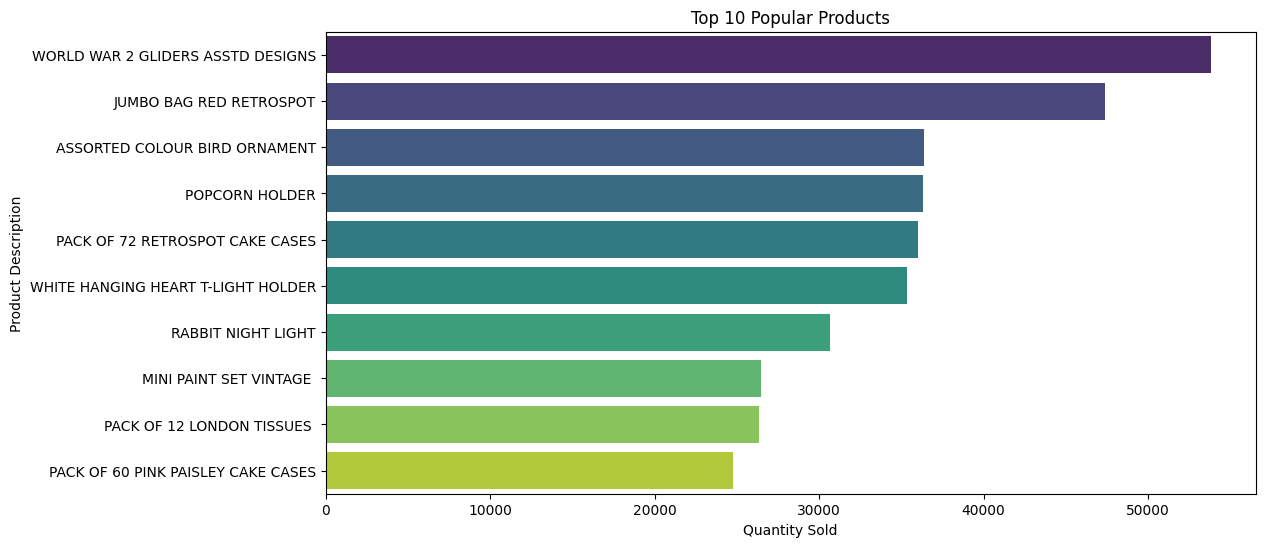

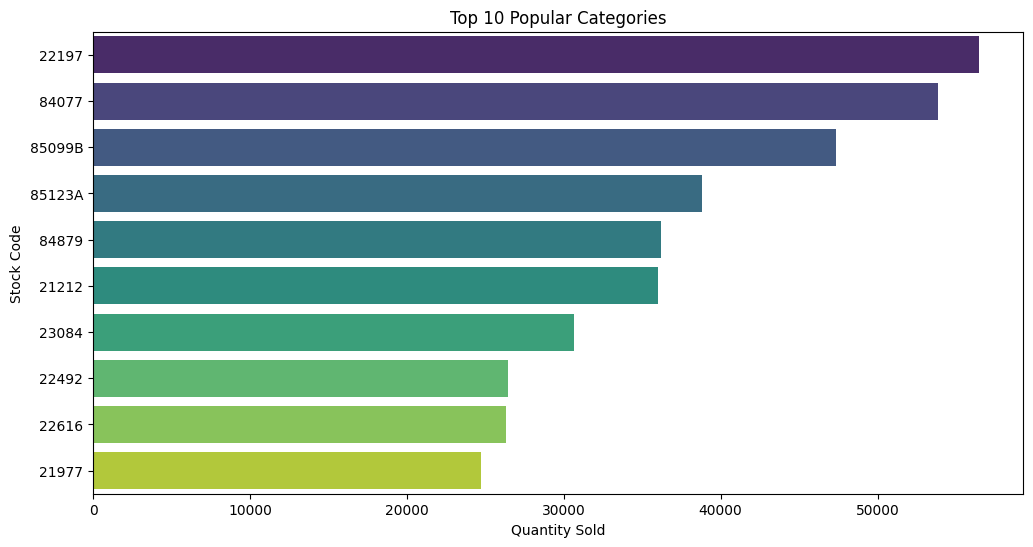

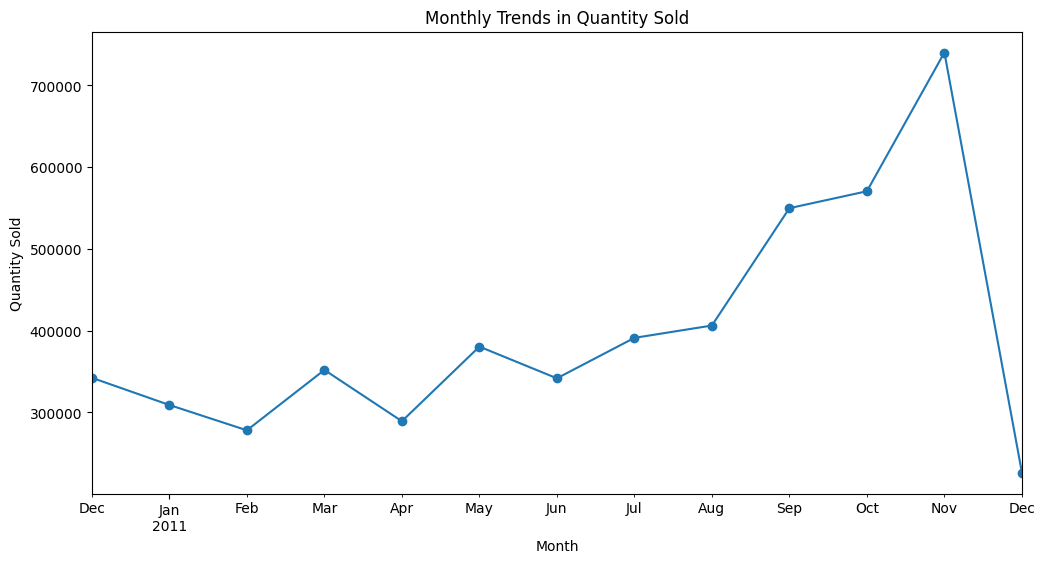

In [75]:
# Analyze the purchasing patterns of customers. Identifying popular categories and trends.

top_n_products = 10
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n_products)

# Visualize the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', hue=top_products.index, dodge=False, legend=False)
plt.title(f'Top {top_n_products} Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# Analyze popular categories
top_n_categories = 10
top_categories = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(top_n_categories)

# Visualize the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', hue=top_categories.index, dodge=False, legend=False)
plt.title(f'Top {top_n_categories} Popular Categories')
plt.xlabel('Quantity Sold')
plt.ylabel('Stock Code')
plt.show()

# Analyze trends over time
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # Extract month from 'InvoiceDate'
monthly_trends = df.groupby('Month')['Quantity'].sum()

# Visualize trends over time
plt.figure(figsize=(12, 6))
monthly_trends.plot(marker='o')
plt.title('Monthly Trends in Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

Unique Countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


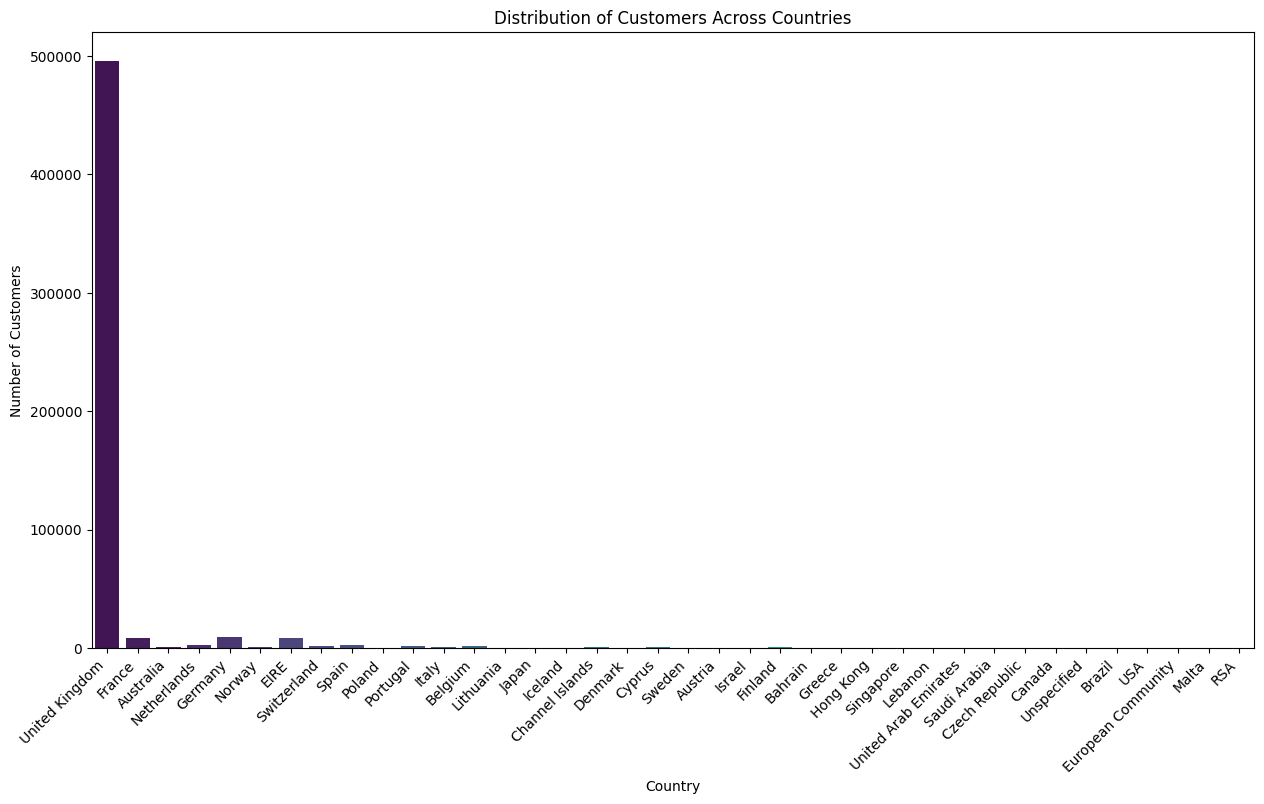

In [76]:
# Geographic segmentation

# Explore unique countries
unique_countries = df['Country'].unique()
print("Unique Countries:", unique_countries)

# Visualize the distribution of customers across countries
plt.figure(figsize=(15, 8))
sns.countplot(x='Country', data=df, palette='viridis', hue='Country', dodge=False, legend=False)
plt.title('Distribution of Customers Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Choose a specific country for detailed analysis (e.g., 'United Kingdom')
selected_country = 'Japan'
country_df = df[df['Country'] == selected_country]

Summary Statistics:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


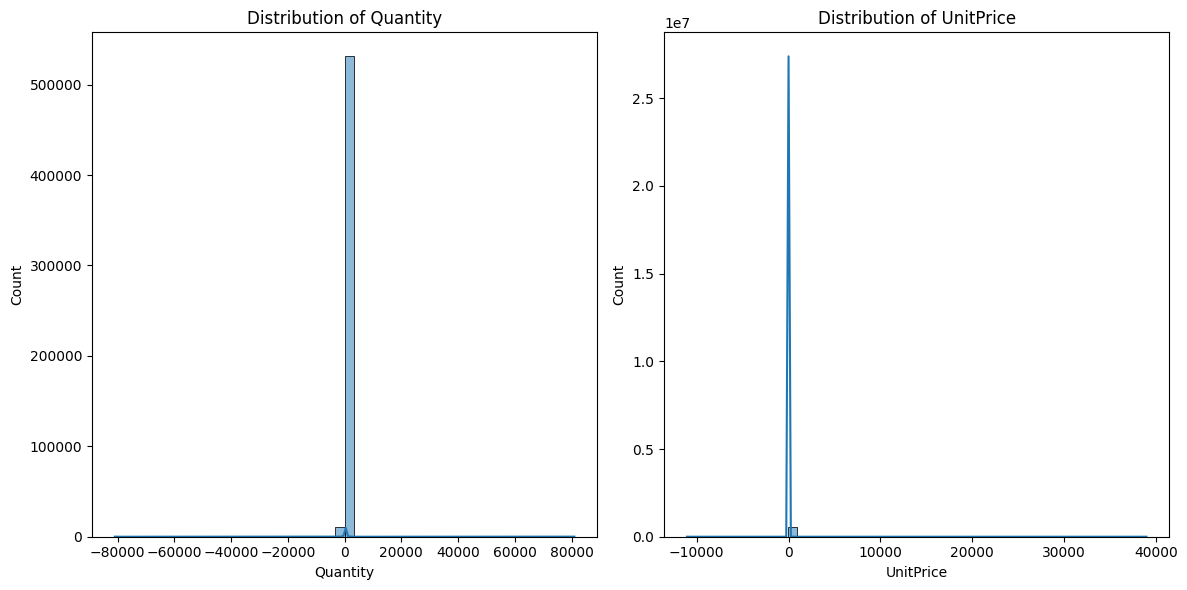

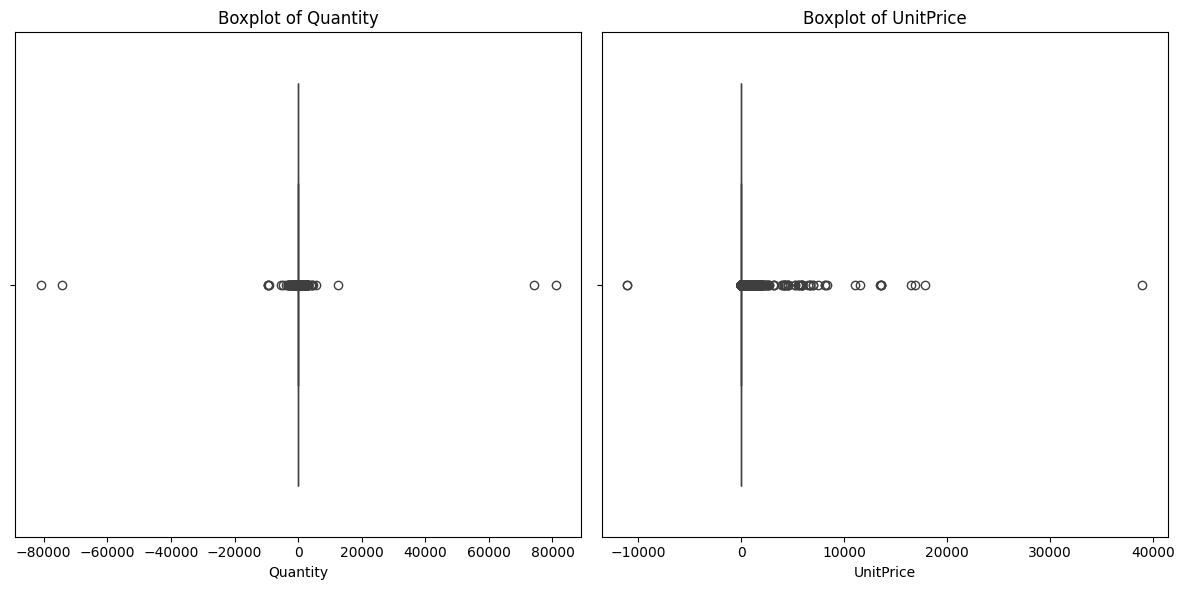

In [77]:
# The distribution of quantitative variables (Quantity, UnitPrice) and identifying outliers.

import seaborn as sns
import matplotlib.pyplot as plt

print("Summary Statistics:")
print(df[['Quantity', 'UnitPrice']].describe())

# Visualize the distribution of Quantity and UnitPrice
plt.figure(figsize=(12, 6))

# Distribution plot for Quantity
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')

# Distribution plot for UnitPrice
plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))

# Boxplot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')

# Boxplot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

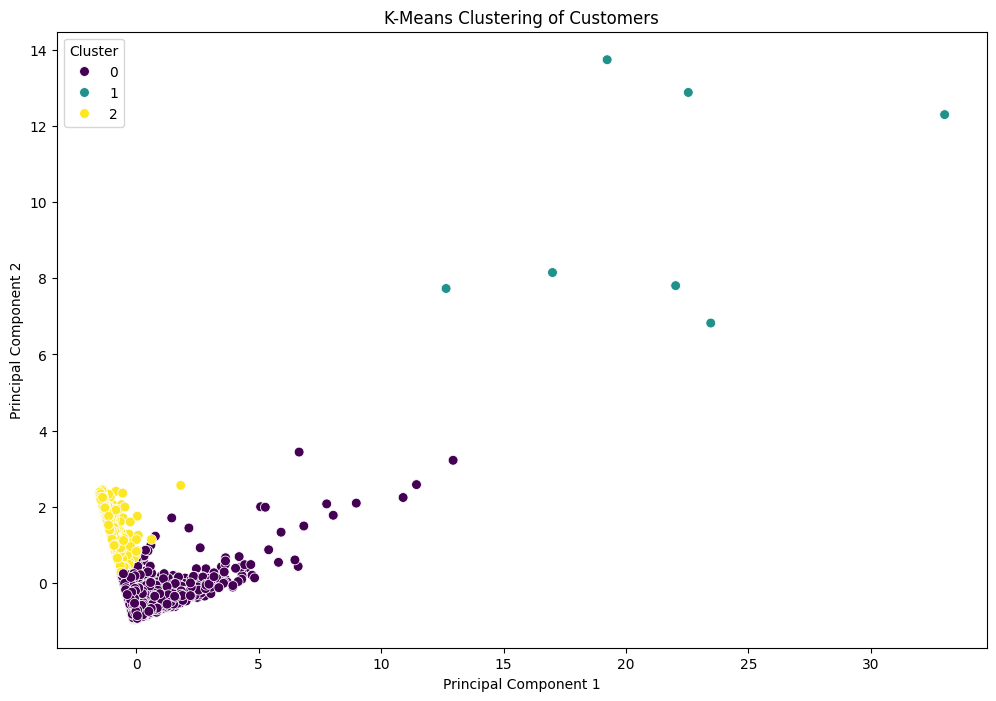

   Cluster     Recency   Frequency      Monetary  Number of Customers
0        0   39.946045    5.949111    337.097368                 3262
1        1   40.142857  109.428571  28197.814286                    7
2        2  246.459655    1.829556    100.474752                 1103


In [78]:
# K-Means clusterization based on customers behavior.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Calculate Recency, Frequency, and Monetary values
current_date = df['InvoiceDate'].max() + pd.DateOffset(1)
rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}).reset_index()

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Choose the optimal number of clusters and fit the K-Means model
optimal_clusters = 3  # Choose based on the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm_data['Cluster'] = kmeans_optimal.fit_predict(rfm_scaled)

# Visualize the clusters in 3D space using PCA
pca = PCA(n_components=3)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=rfm_data['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'}).reset_index()

print(cluster_analysis)

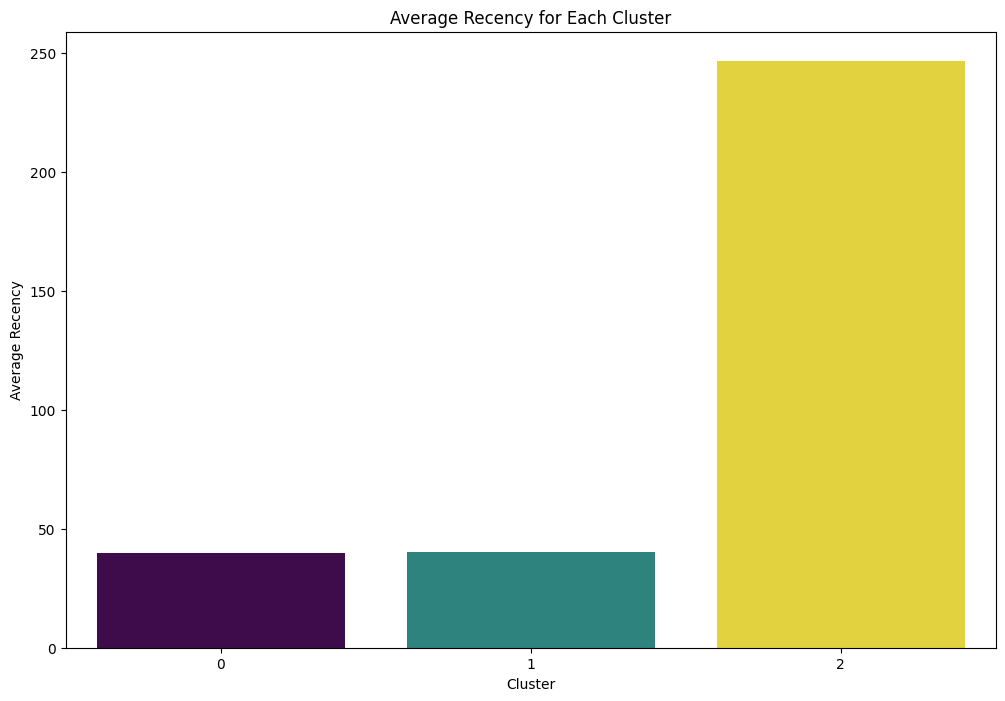

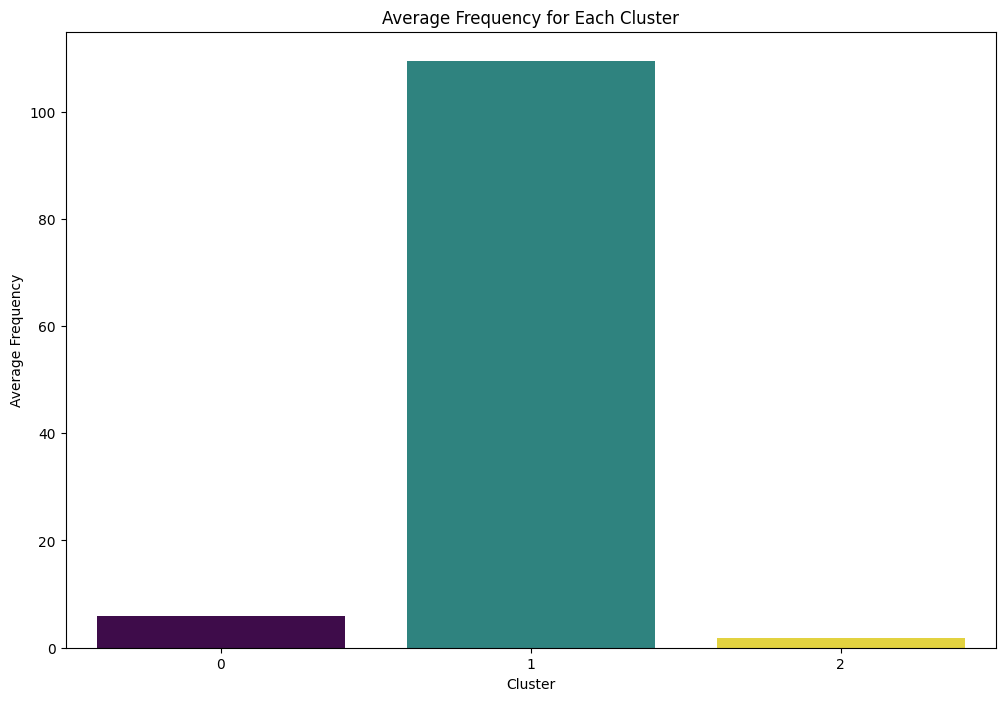

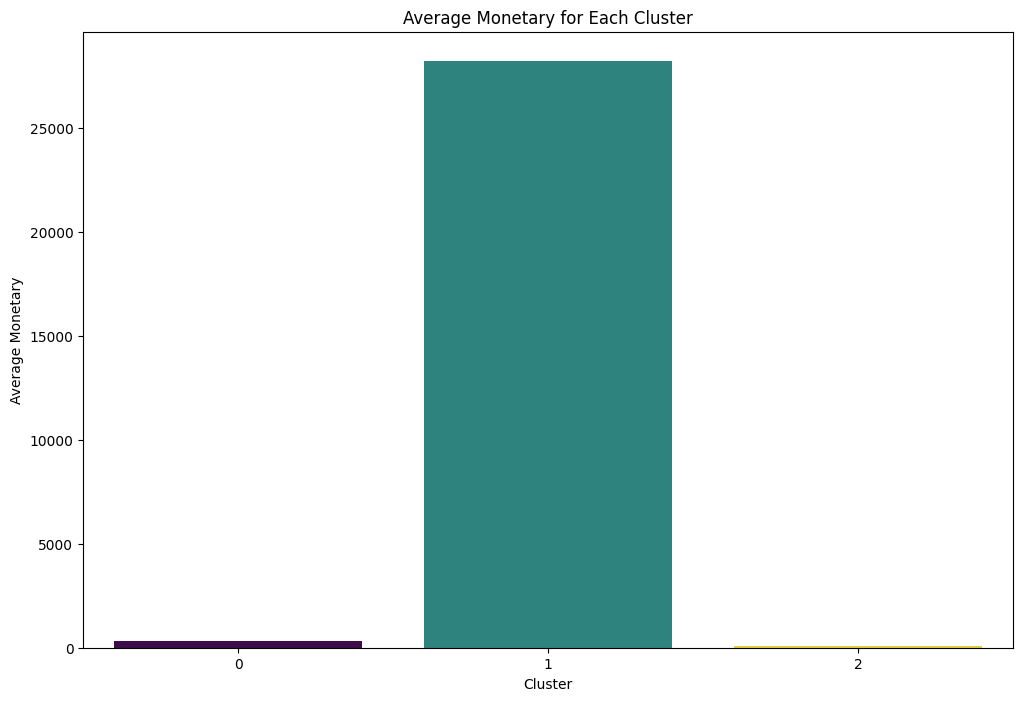

In [79]:
#customer profiles for the clusters identified through K-Means clustering.

cluster_profiles = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'}).reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Recency', data=rfm_data, palette='viridis', errorbar=None, hue='Cluster', legend=False)
plt.title('Average Recency for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Frequency', data=rfm_data, palette='viridis', errorbar=None, hue='Cluster', legend=False)
plt.title('Average Frequency for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Monetary', data=rfm_data, palette='viridis', errorbar=None, hue='Cluster', legend=False)
plt.title('Average Monetary for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary')
plt.show()

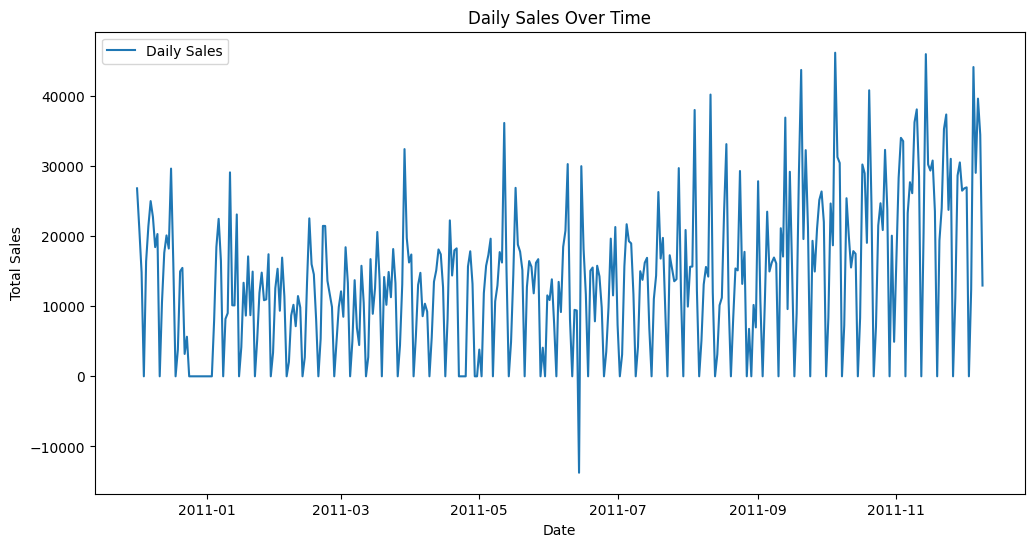

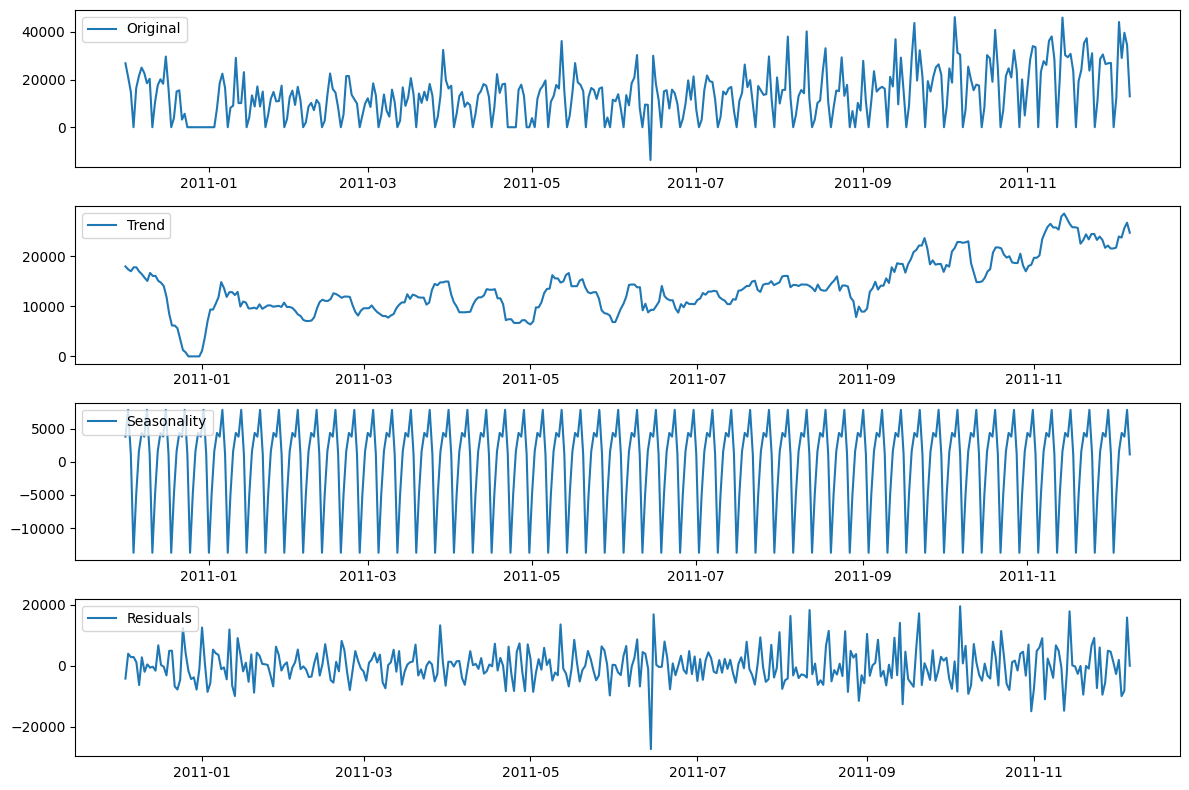

In [80]:
# Seasonal trends and patterns in sales.

from statsmodels.tsa.seasonal import seasonal_decompose

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')
df.set_index('InvoiceDate', inplace=True)

# Resample the data to daily frequency and sum the sales
daily_sales = df['Quantity'].resample('D').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(daily_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(daily_sales, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()